Dataset https://www.kaggle.com/datasets/purumalgi/music-genre-classification/data

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [47]:
from t import Test

# Load data

In [2]:
df = pd.read_csv("../data/train.csv")
df.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


In [4]:
df.shape

(17996, 17)

In [57]:
df.columns

Index(['Artist Name', 'Track Name', 'Popularity', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_in min/ms', 'time_signature', 'Class'],
      dtype='object')

# EDA

In [5]:
df["Class"].value_counts()

10    4949
6     2587
9     2524
8     1854
5     1447
1     1373
2     1272
0      625
7      576
3      402
4      387
Name: Class, dtype: int64

<AxesSubplot:>

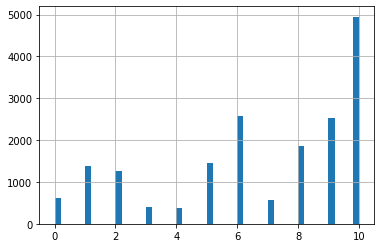

In [7]:
df["Class"].hist(bins=50)

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Popularity,17568.0,44.512124,17.426928,1.000000,33.000000,44.00000,56.00000,100.000
danceability,17996.0,0.543433,0.166268,0.059600,0.432000,0.54500,0.65900,0.989
energy,17996.0,0.662777,0.235373,0.000020,0.509000,0.70000,0.86000,1.000
key,15982.0,5.952447,3.196854,1.000000,3.000000,6.00000,9.00000,11.000
loudness,17996.0,-7.910660,4.049151,-39.952000,-9.538000,-7.01600,-5.18900,1.355
mode,17996.0,0.636753,0.480949,0.000000,0.000000,1.00000,1.00000,1.000
speechiness,17996.0,0.079707,0.083576,0.022500,0.034800,0.04740,0.08300,0.955
acousticness,17996.0,0.247082,0.310632,0.000000,0.004300,0.08140,0.43400,0.996
instrumentalness,13619.0,0.177562,0.304048,0.000001,0.000089,0.00391,0.20000,0.996
liveness,17996.0,0.196170,0.159212,0.011900,0.097500,0.12900,0.25800,1.000


<AxesSubplot:>

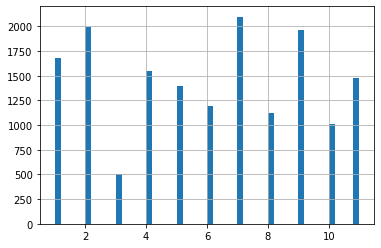

In [9]:
df["key"].hist(bins=50)

<AxesSubplot:>

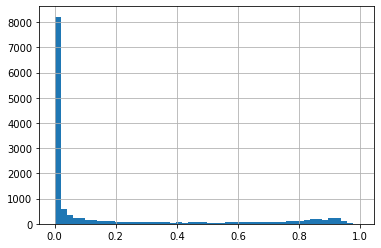

In [10]:
df["instrumentalness"].hist(bins=50)

In [49]:
from pipe import Imputer

In [15]:
s = pd.Series([0, 1, 2, None, 2, 3 ,10])

In [16]:
Imputer().fit_transform(s)

0     0.0
1     1.0
2     2.0
3     3.0
4     2.0
5     3.0
6    10.0
dtype: float64

In [17]:
Imputer(strategy="mode").fit_transform(s)

0     0.0
1     1.0
2     2.0
3     2.0
4     2.0
5     3.0
6    10.0
dtype: float64

In [18]:
drop_columns = ["Artist Name", "Track Name"]

# Train model

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import classification_report

In [20]:
df_train, df_test = train_test_split(df.drop(drop_columns, axis=1), random_state=31)

In [45]:
df_train.columns

Index(['Popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_in min/ms', 'time_signature', 'Class'],
      dtype='object')

In [50]:
pipe = ColumnTransformer([("key_imputer", Imputer(strategy="mode"), "key"),
                          ("instrumentalness_imputer", Imputer(), "instrumentalness")],
                         remainder="passthrough")

In [53]:
x_train = pipe.fit_transform(df_train.drop("Class", axis=1))
y_train = df_train["Class"]

x_test = pipe.transform(df_test.drop("Class", axis=1))
y_test = df_test["Class"]

In [54]:
pool_train = Pool(x_train, y_train)
pool_test = Pool(x_test, y_test)

In [55]:
model = CatBoostClassifier()
model.fit(pool_train)
y_pr = model.predict(pool_test)

Learning rate set to 0.090358
0:	learn: 2.2293919	total: 15.6ms	remaining: 15.6s
1:	learn: 2.1074145	total: 32.7ms	remaining: 16.3s
2:	learn: 2.0214116	total: 46.7ms	remaining: 15.5s
3:	learn: 1.9419846	total: 60.4ms	remaining: 15s
4:	learn: 1.8759144	total: 72.8ms	remaining: 14.5s
5:	learn: 1.8190779	total: 84.6ms	remaining: 14s
6:	learn: 1.7716522	total: 99ms	remaining: 14s
7:	learn: 1.7238903	total: 110ms	remaining: 13.6s
8:	learn: 1.6830328	total: 120ms	remaining: 13.2s
9:	learn: 1.6494080	total: 133ms	remaining: 13.2s
10:	learn: 1.6233234	total: 144ms	remaining: 13s
11:	learn: 1.5936821	total: 156ms	remaining: 12.8s
12:	learn: 1.5704296	total: 168ms	remaining: 12.7s
13:	learn: 1.5490828	total: 178ms	remaining: 12.5s
14:	learn: 1.5267896	total: 188ms	remaining: 12.4s
15:	learn: 1.5131933	total: 203ms	remaining: 12.5s
16:	learn: 1.4975003	total: 215ms	remaining: 12.5s
17:	learn: 1.4823205	total: 231ms	remaining: 12.6s
18:	learn: 1.4636881	total: 243ms	remaining: 12.5s
19:	learn: 1.4

In [41]:
pd.DataFrame(classification_report(y_test, y_pr, output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.703704,0.786207,0.742671,145.000000
1,0.076923,0.028481,0.041570,316.000000
2,0.516393,0.368421,0.430034,342.000000
3,0.806452,0.728155,0.765306,103.000000
4,0.715789,0.680000,0.697436,100.000000
5,0.736994,0.689189,0.712291,370.000000
6,0.367698,0.331783,0.348818,645.000000
7,0.930380,0.924528,0.927445,159.000000
8,0.621053,0.514161,0.562574,459.000000
9,0.568404,0.565640,0.567019,617.000000


In [42]:
from pickle import dump

In [56]:
with open("../models/v1/pipe.pcl", "wb") as fid:
    dump(pipe, fid)

In [44]:
model.save_model("../models/v1/model.pcl")